![for sale image, from https://jpc-chicago.com/for-sale-signs-make-custom-real-estate-signs-and-sale-yard-sign/](images/forsale.jpg)

# Recommending "Offer Price" for First-Time Home Buyers
**Author:** Shawn Samuel
***

## Overview

This project has tasked us to formulate a business project around a given data set. The data set describes house sales over a 1 year period in King County, USA. I have decided to develop a price prediction tool for a real estate agency that focuses on the needs of home buyers. I will be cleaning the data, testing various transformations like log transformation for continuous variables, one hot encoding for categorical variables, and scaling to prepare the data for multiple linear regression models. I was able to build statistically significant model that could explain 51.3% of the variation in prices from our prediciton and strongly feel that further development will lead to a more accurate tool that can be extremely useful for buyer real estate agents assisting first-time home buyers.

## Business Problem

The housing market is booming! With decreased mortgage rates, increased demand and decreased supply - housing prices are also sky high. According to the New York Times, typically 55% to 70% of American home buyers are selling one home and buying another, with the remainder buying a home for the first time. However in recent months, the number of first-time buyers has sharply risen. This leads to increased demand without an equivalent increase in supply. 

I have been tasked with helping first-time home buyers with one of the crucial elements of home buying - determining an 'offer price'. There can be many factors that contribute to this. And being first-time home buyers, it can be daunting to figure out what this magic price should be. 

This important price point is often guided buy Buyer's Real Estate Agent and this data driven prediction tool is being built for one such hypothetical agency called ACME Realtors. I will use the historical data of houses sold in King County, Washington to predict the best asking price based on relevant factors.

## Data Understanding

The data set ('kc_house_data.csv') describes house sales in King County, Washington, USA (which includes the city of Seattle) between 2014 and 2015. There are 21,597 rows of entries across 21 columns, including the target variable 'price'. The dependant variables include information about individual homes that have been sold such as square footage, year built, and many more details. 

I will prepare and explore the data to see which ones have the most impact for asking price determination for first-time home buyers. We will focus on the middle and low end of the market in terms of price, as first-time home buyers will likely not be in the luxury home market.

## Data Preparation & Initial Model

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker #to format axes
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #supress warnings that don't affect program
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import eli5

import sjs_utilities as sjs #custom functions

In [2]:
#read data set
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [5]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

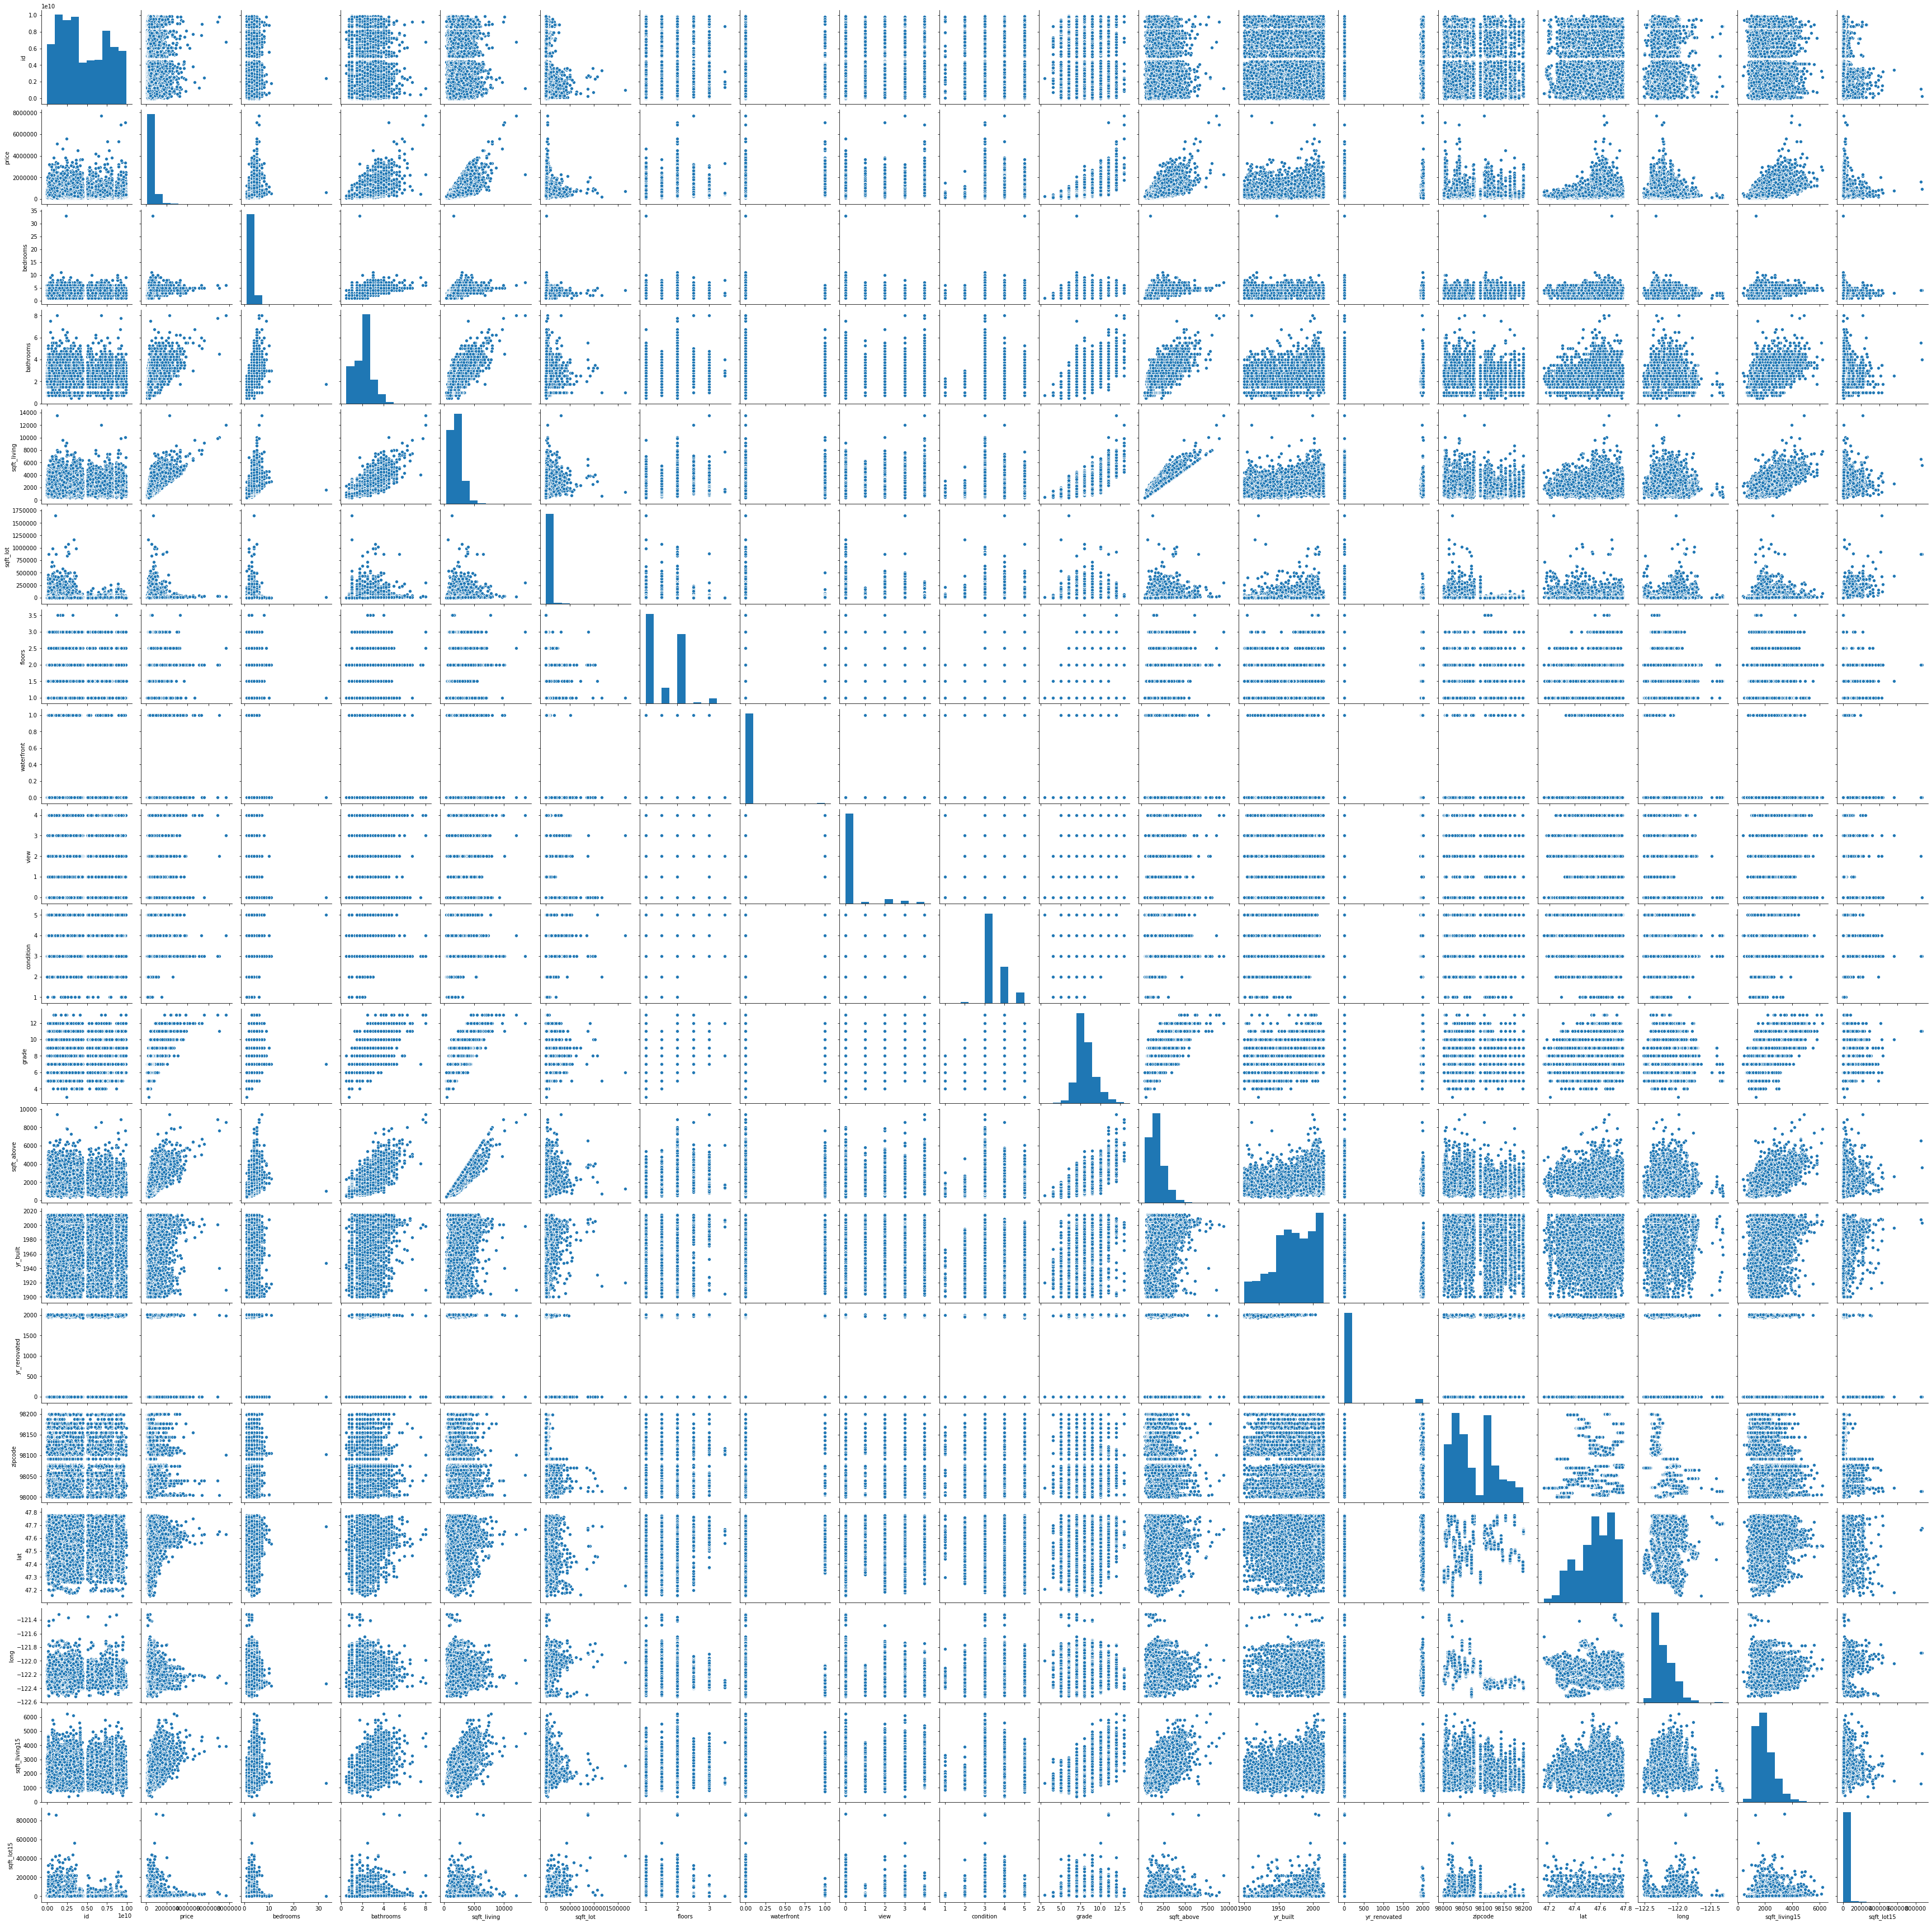

In [6]:
sns.pairplot(df)

In [7]:
#check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#for initial model - dropping columns recommended by the curriculum as well as those with null values
#also dropping sqft_lot as it visually does not seem to correlate

In [9]:
df = df.drop(columns=['id', 'date', 'sqft_lot', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode'])
df.head()

price  bedrooms  bathrooms  sqft_living  floors  condition  grade  \
0  221900.0         3       1.00         1180     1.0          3      7   
1  538000.0         3       2.25         2570     2.0          3      7   
2  180000.0         2       1.00          770     1.0          3      6   
3  604000.0         4       3.00         1960     1.0          5      7   
4  510000.0         3       2.00         1680     1.0          3      8   

   yr_built  
0      1955  
1      1951  
2      1933  
3      1965  
4      1987

In [10]:
#sanity check
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
grade          0
yr_built       0
dtype: int64

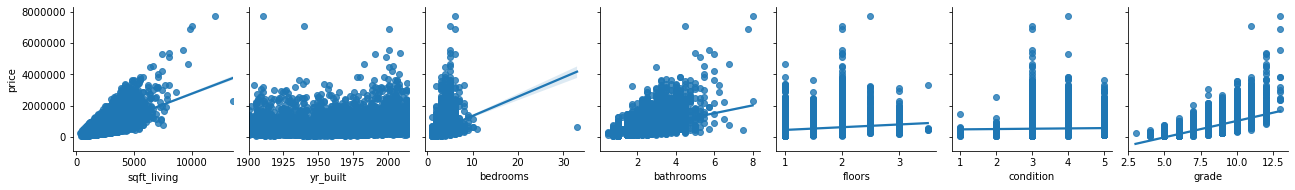

In [11]:
sns.pairplot(df, x_vars=['sqft_living', 'yr_built', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade'], y_vars='price', kind='reg');

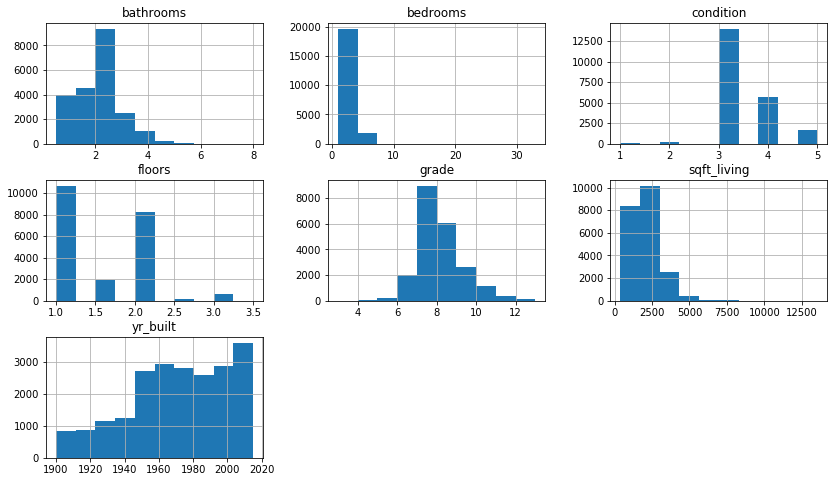

In [12]:
df[['sqft_living', 'yr_built','bedrooms','bathrooms','floors','condition','grade']].hist(figsize  = [14, 8]); 

⮕ Let's build a base model:

Train R2: 0.622
Test R2: 0.603
---
Train MAE: 144572.71
Test MAE: 146023.17
---
Train RMSE: 225273.76
Test RMSE: 233391.92


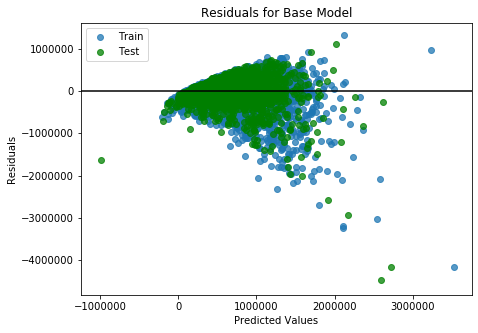

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     3803.
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:15:08   Log-Likelihood:            -2.2261e+05
No. Observations:               16197   AIC:                         4.452e+05
Df Residuals:                   16189   BIC:                         4.453e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.422e+05   1.28e+04    -11.147      0.000   -1.67e+05   -1.17e+05
bedrooms    -4.917e+05   2.52e+04    -19.524      0.000   -5.41e+05   -4.42e+05
bathrooms     4.23e+05    3.1e+04     13.659      0.000    3.62e+05    4.84e+05
sqft_living  2.356e+06   5.14e+04     45.841      0.000    2.26e+06    2.46e+06
floors       6.031e+04   1.03e+04      5.872      0.000    4.02e+04    8.04e+04
condition      8.9e+04   1.18e+04      7.512      0.000    6.58e+04    1.12e+05
grade        1.345e+06   2.57e+04     52.418      0.000    1.29e+06     1.4e+06
yr_built    -4.693e+05   9082.320    -51.668      0.000   -4.87e+05   -4.51e+05
==============================================================================
Omnibus:                    12024.430   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           585171.945
Skew:                           3.083   Prob(JB):                         0.00
Kurtosis:                      31.794   Cond. No.                         46.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#Define X and y
X_cols = [c for c in df.columns.to_list() if c not in ['price']]
X = df[X_cols]
y = df.price
    
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
#instantiate scaler
scaler = MinMaxScaler()
    
#Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
#instantiate linear regression
lr = LinearRegression()
    
#Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)
    
#make training and test predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)
    
#calculate residuals
residuals_train = y_train_pred - y_train
residuals_test = y_test_pred - y_test
    
#print train and test R2, MAE, RMSE
print(f"Train R2: {r2_score(y_train, y_train_pred):.3f}")
print(f"Test R2: {r2_score(y_test, y_test_pred):.3f}")
print("---")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print("---")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
                    
#risduals plot training and test predictions
plt.figure(figsize=(7,5))
plt.scatter(y_train_pred, residuals_train, alpha=.75, label = "Train")
plt.scatter(y_test_pred, residuals_test, color='g', alpha=.75, label = "Test")
plt.axhline(y=0, color='black')
plt.legend()
plt.title('Residuals for Base Model')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()
    
# display feature weights using ELI5
display(eli5.show_weights(lr, feature_names=list(X.columns)))


#display Statsmodels summary
sm_mod = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train_scaled,
                                                     columns=X.columns,
                                                     index=X_train.index))).fit()
results = sm_mod.summary()
results

---
### Data Exploration & Modeling
Now that we have a preliminary model to test against, let's explore the data to see what areas we can try and improve. To model and analyze the data, I created a custom function as a pyfile. The particular model and scaler to be used was defined before the function and options to log, OHE and scale were provided. Within the function, a train/test split was performed for validation. The output included R2, MAE, and RMSE metrics, a risiduals plot, weights of features and a dataframe containing all previous metrics. All of these outputs were used in tandem to analyze the effectiveness of each regression. 

#### Plan Outline: 
➡️ Create a pyfile function for subsequent analysis  
☐ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☐ Log continous variables  
☐ One Hot Encode categorical variables  
☐ Create an age columns based on year built or renovation year   
☐ Create a category of within Seattle vs. outside Seattle  
☐ Set a price ceiling

In [14]:
#restore all original columns
#continuous and categorical variables (below) will define features to model
df = pd.read_csv('data/kc_house_data.csv')

In [15]:
#the following are required before initiating the model_analysis function

lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'yr_built'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade'] #define categorical variables

Train R2: 0.622
Test R2: 0.606
---
Train MAE: 145603.49
Test MAE: 144470.47
---
Train RMSE: 227542.05
Test RMSE: 226936.63


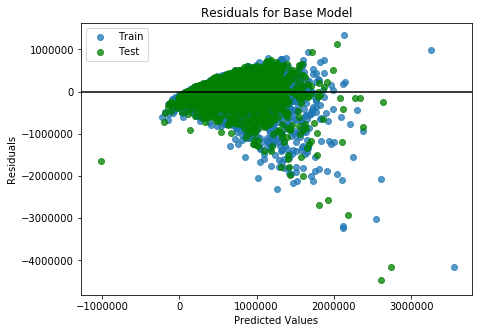

Model Name     R2        MAE       RMSE
0  Base Model  0.606  144470.47  226936.63

In [16]:
#the documentation for the function "sjs.model_analysis" is included
model, scaler, y_train_pred, y_test_pred, X_test, y_test, X, y = sjs.model_analysis('Base Model', lr, df, continuous, categoricals, log=False, OHE=False, scale=True)

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
➡️ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☐ Log continous variables  
☐ One Hot Encode categorical variables  
☐ Create an age columns based on year built or renovation year   
☐ Create a category of within Seattle vs. outside Seattle  
☐ Set a price ceiling

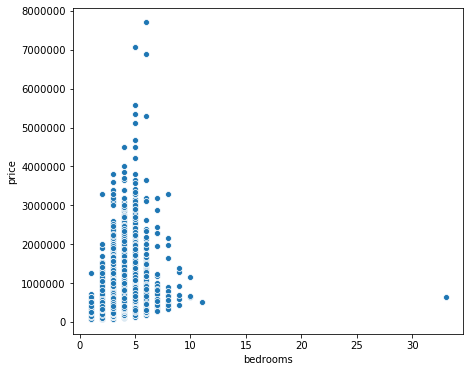

In [17]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=df['bedrooms'],y=df['price'])

In [18]:
df['bedrooms'].value_counts().sort_values(ascending = False)

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [19]:
# The 33 bedroom house is extreme. Let's remove it and see how the metrics are affected.

In [20]:
df.loc[df['bedrooms'] == 33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15856      6000     1.0         0.0   0.0  ...      7        1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15856          580.0     1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

In [21]:
df = df.drop([0,15856])

In [22]:
#sanity check
df.loc[df['bedrooms'] == 33]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

Train R2: 0.621
Test R2: 0.609
---
Train MAE: 148286.55
Test MAE: 143466.52
---
Train RMSE: 233737.61
Test RMSE: 213338.85


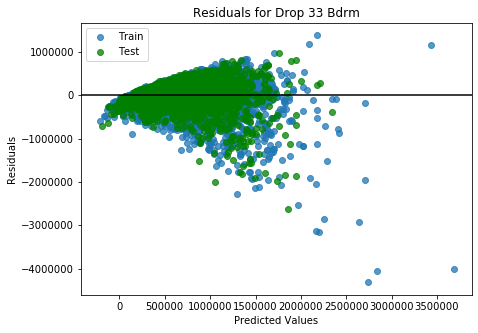

Model Name     R2        MAE       RMSE
1  Drop 33 Bdrm  0.609  143466.52  213338.85
0    Base Model  0.606  144470.47  226936.63

In [23]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'yr_built'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade'] #define categorical variables
model, scaler, y_train_pred, y_test_pred, X_test, y_test, X, y = sjs.model_analysis('Drop 33 Bdrm', lr, df, continuous, categoricals, log=False, OHE=False, scale=True)

➡️Improvement in all metrics

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
☒ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
➡️ Log continous variables  
☐ One Hot Encode categorical variables  
☐ Create an age columns based on year built or renovation year   
☐ Create a category of within Seattle vs. outside Seattle  
☐ Set a price ceiling

Train R2: 0.570
Test R2: 0.583
---
Train MAE: 154181.61
Test MAE: 147428.18
---
Train RMSE: 248918.28
Test RMSE: 220297.41


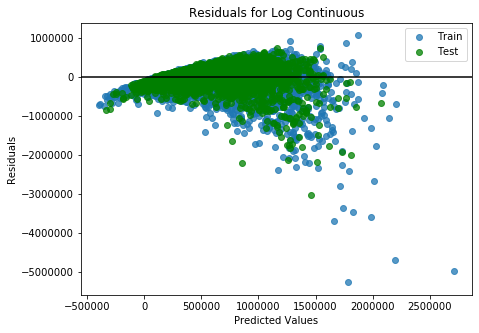

Model Name     R2        MAE       RMSE
2  Log Continuous  0.583  147428.18  220297.41
1    Drop 33 Bdrm  0.609  143466.52  213338.85
0      Base Model  0.606  144470.47  226936.63

In [24]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'yr_built'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade'] #define categorical variables
model, scaler, y_train_pred, y_test_pred, X_test, y_test, X, y = sjs.model_analysis('Log Continuous', lr, df, continuous, categoricals, log=True, OHE=False, scale=True)

R2 has decreased - and the impact of logged features has decreased

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
☒ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☒ Log & Normalize continous variables  
➡️ One Hot Encode categorical variables  
☐ Create an age columns based on year built and renovation year   
☐ Create a category of within Seattle vs. outside Seattle

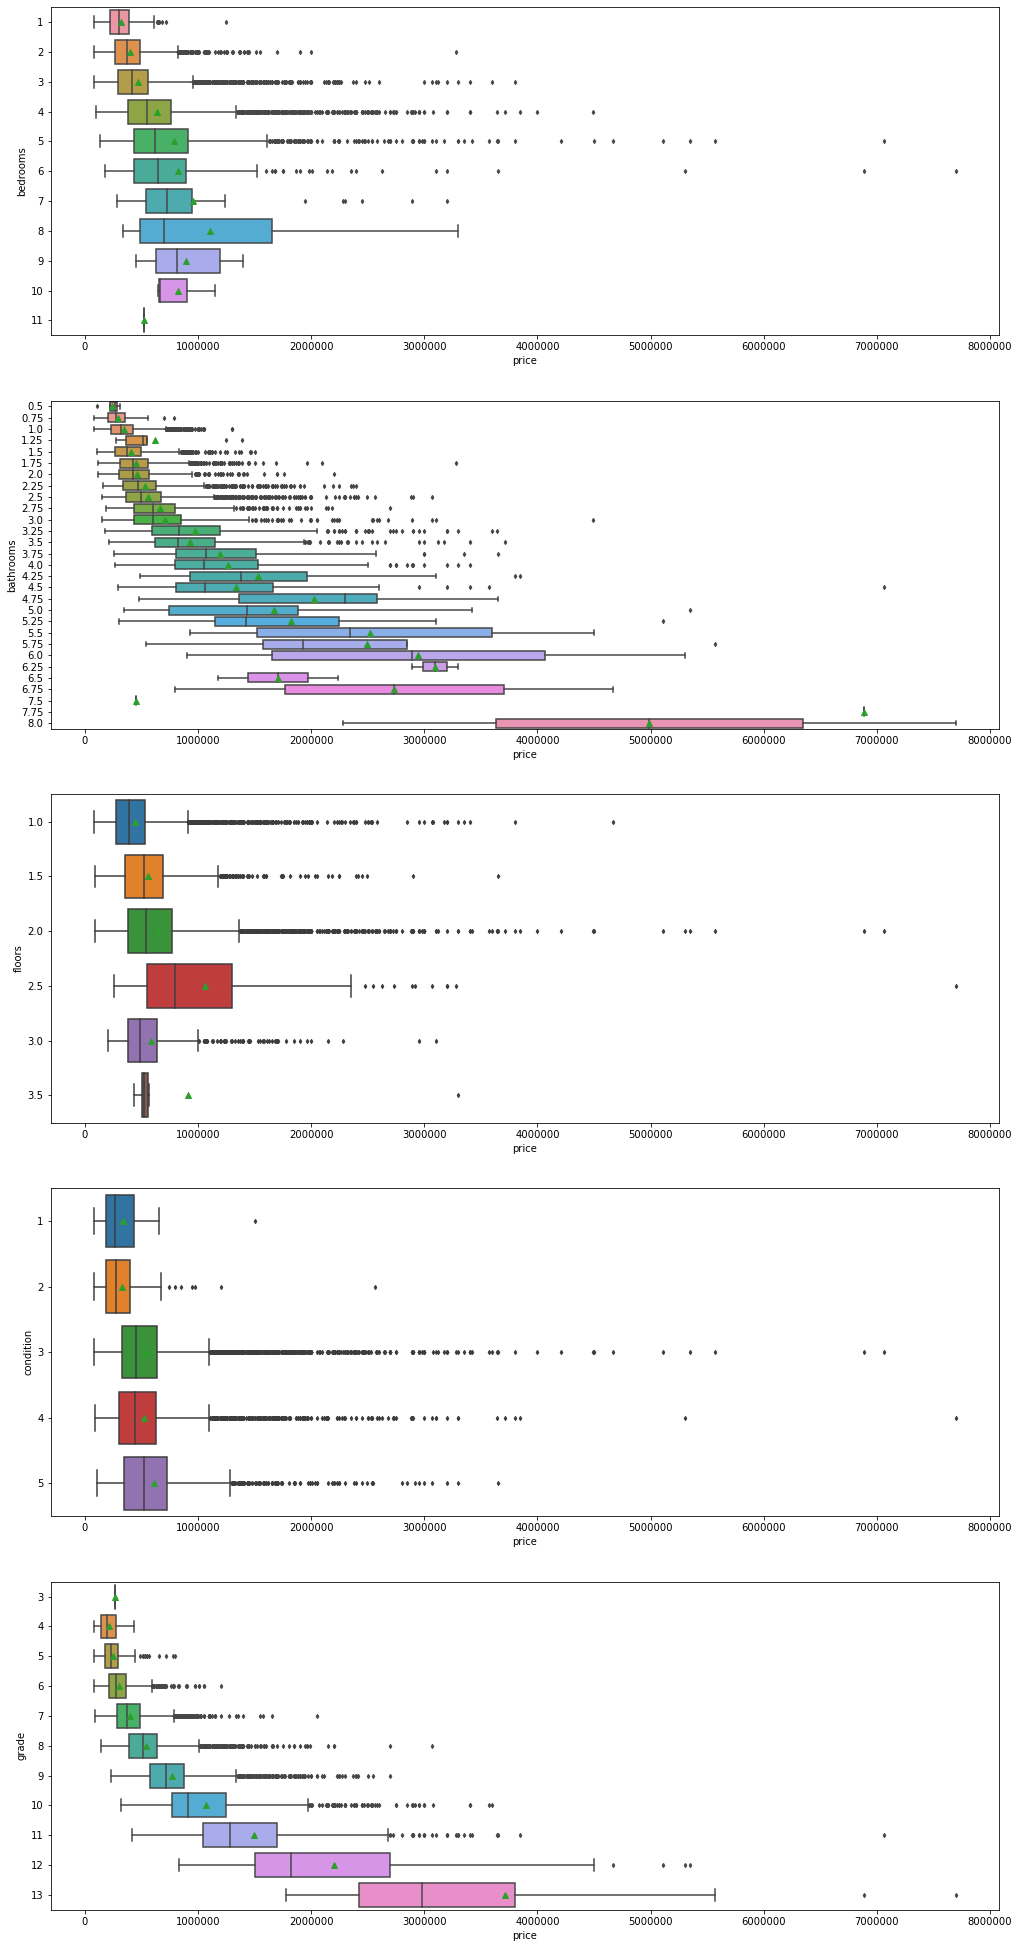

In [25]:
fig, axarr = plt.subplots(5, figsize=(17,35))
sns.boxplot(y = 'bedrooms', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'bathrooms', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'floors', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'condition', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'grade', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
plt.show()

Train R2: 0.659
Test R2: 0.594
---
Train MAE: 140320.64
Test MAE: 137320.29
---
Train RMSE: 221634.72
Test RMSE: 217377.62


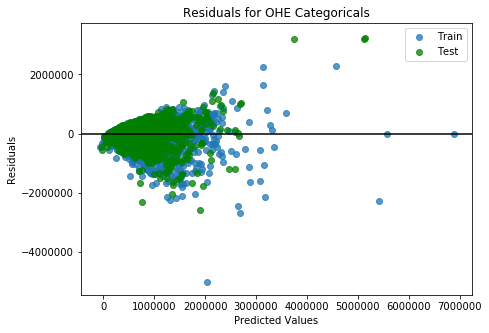

Model Name     R2        MAE       RMSE
3  OHE Categoricals  0.594  137320.29  217377.62
2    Log Continuous  0.583  147428.18  220297.41
1      Drop 33 Bdrm  0.609  143466.52  213338.85
0        Base Model  0.606  144470.47  226936.63

In [26]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'yr_built'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade'] #define categorical variables
model, scaler, y_train_pred, y_test_pred, X_test, y_test, X, y = sjs.model_analysis('OHE Categoricals', lr, df, continuous, categoricals, log=True, OHE=True, scale=True)

➡️R2 has decreased but MAE and RMSE have also lowered. Also visual amount of negative predictions have decreased.

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
☒ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☒ Log continous variables  
☒ One Hot Encode categorical variables  
➡️ Create an age columns based on year built or renovation year   
☐ Create a category of within Seattle vs. outside Seattle  
☐ Set a price ceiling

In [27]:
#fill renovation nulls with 0 to assume it hasn't been renovated
df = df.fillna({'yr_renovated':0})

In [28]:
#sanity check
df['yr_renovated'].isna().sum()

0

In [29]:
#check dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 1 to 21596
Data columns (total 21 columns):
id               21595 non-null int64
date             21595 non-null object
price            21595 non-null float64
bedrooms         21595 non-null int64
bathrooms        21595 non-null float64
sqft_living      21595 non-null int64
sqft_lot         21595 non-null int64
floors           21595 non-null float64
waterfront       19220 non-null float64
view             21532 non-null float64
condition        21595 non-null int64
grade            21595 non-null int64
sqft_above       21595 non-null int64
sqft_basement    21595 non-null object
yr_built         21595 non-null int64
yr_renovated     21595 non-null float64
zipcode          21595 non-null int64
lat              21595 non-null float64
long             21595 non-null float64
sqft_living15    21595 non-null int64
sqft_lot15       21595 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [30]:
df['age'] = np.where(df['yr_built'] > df['yr_renovated'], 2021-df['yr_built'], 2021-df['yr_renovated'])
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1  6414100192  12/9/2014   538000.0         3       2.25         2570   
2  5631500400  2/25/2015   180000.0         2       1.00          770   
3  2487200875  12/9/2014   604000.0         4       3.00         1960   
4  1954400510  2/18/2015   510000.0         3       2.00         1680   
5  7237550310  5/12/2014  1230000.0         4       4.50         5420   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
1      7242     2.0         0.0   0.0  ...        2170          400.0   
2     10000     1.0         0.0   0.0  ...         770            0.0   
3      5000     1.0         0.0   0.0  ...        1050          910.0   
4      8080     1.0         0.0   0.0  ...        1680            0.0   
5    101930     1.0         0.0   0.0  ...        3890         1530.0   

   yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
1      1951       1991.0    98125  47.7210 -122.319           1690   
2      1933          0.0    98028  47.7379 -122.233           2720   
3      1965          0.0    98136  47.5208 -122.393           1360   
4      1987          0.0    98074  47.6168 -122.045           1800   
5      2001          0.0    98053  47.6561 -122.005           4760   

   sqft_lot15   age  
1        7639  30.0  
2        8062  88.0  
3        5000  56.0  
4        7503  34.0  
5      101930  20.0  

[5 rows x 22 columns]

Train R2: 0.635
Test R2: 0.568
---
Train MAE: 146023.08
Test MAE: 143054.28
---
Train RMSE: 229370.53
Test RMSE: 224208.53


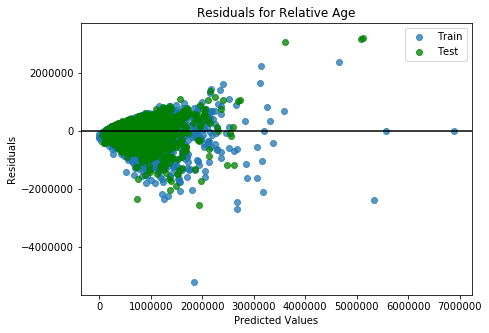

Model Name     R2        MAE       RMSE
4      Relative Age  0.568  143054.28  224208.53
3  OHE Categoricals  0.594  137320.29  217377.62
2    Log Continuous  0.583  147428.18  220297.41
1      Drop 33 Bdrm  0.609  143466.52  213338.85
0        Base Model  0.606  144470.47  226936.63

In [31]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'age'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade'] #define categorical variables
model, scaler, y_train_pred, y_test_pred, X_test, y_test, X, y = sjs.model_analysis('Relative Age', lr, df, continuous, categoricals, log=True, OHE=True, scale=True)

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
☒ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☒ Log continous variables  
☒ One Hot Encode categorical variables  
☒ Create an age columns based on year built or renovation year   
➡️ Create a category of within Seattle vs. outside Seattle  
☐ Set a price ceiling

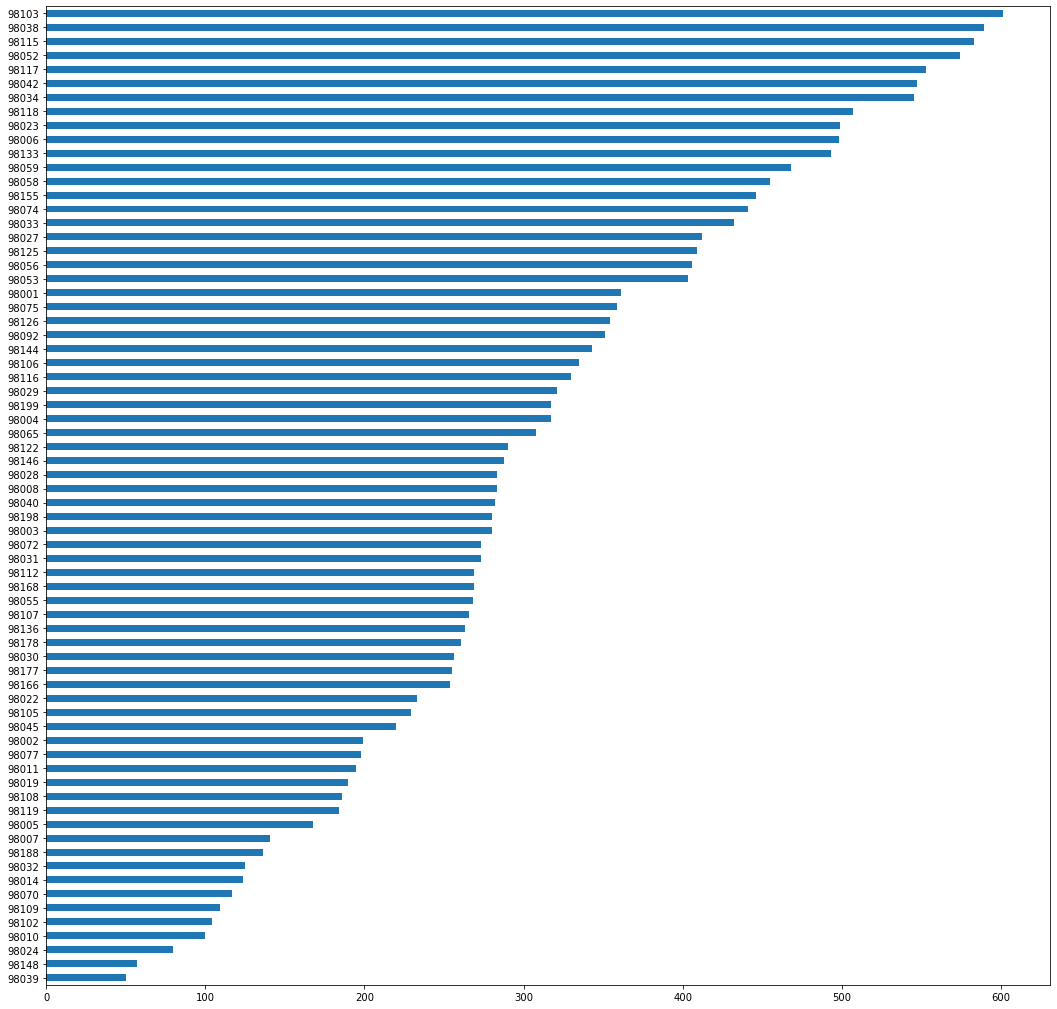

In [32]:
#how many houses there are per zipcode
df['zipcode'].value_counts().sort_values().plot.barh(figsize=(18,18))

In [33]:
#these are the zip codes in Seattle according to https://www.usmapguide.com/washington/seattle-zip-code-map/
seattle_zipcodes = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98110, 
                    98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 
                    98124, 98125, 98126, 98129, 98131, 98132, 98133, 98134, 98136, 98138, 
                    98144, 98145, 98146, 98148, 98151, 98154, 98155, 98158, 98160, 98161, 
                    98164, 98166, 98168, 98170, 98171, 98174, 98177, 98178, 98181, 98184, 
                    98185, 98188, 98190, 98191, 98195, 98198, 98199]

In [34]:
#add binary column for 1 if in Seattle, 0 if not
df['in_seattle'] = np.where(df['zipcode'].isin(seattle_zipcodes), 1, 0)
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1  6414100192  12/9/2014   538000.0         3       2.25         2570   
2  5631500400  2/25/2015   180000.0         2       1.00          770   
3  2487200875  12/9/2014   604000.0         4       3.00         1960   
4  1954400510  2/18/2015   510000.0         3       2.00         1680   
5  7237550310  5/12/2014  1230000.0         4       4.50         5420   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
1      7242     2.0         0.0   0.0  ...          400.0      1951   
2     10000     1.0         0.0   0.0  ...            0.0      1933   
3      5000     1.0         0.0   0.0  ...          910.0      1965   
4      8080     1.0         0.0   0.0  ...            0.0      1987   
5    101930     1.0         0.0   0.0  ...         1530.0      2001   

   yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15   age  \
1        1991.0   98125  47.7210 -122.319           1690        7639  30.0   
2           0.0   98028  47.7379 -122.233           2720        8062  88.0   
3           0.0   98136  47.5208 -122.393           1360        5000  56.0   
4           0.0   98074  47.6168 -122.045           1800        7503  34.0   
5           0.0   98053  47.6561 -122.005           4760      101930  20.0   

   in_seattle  
1           1  
2           0  
3           1  
4           0  
5           0  

[5 rows x 23 columns]

In [35]:
len(df[df['in_seattle']==1])/len(df) #about 41.5% of data in Seattle

0.4154202361657791

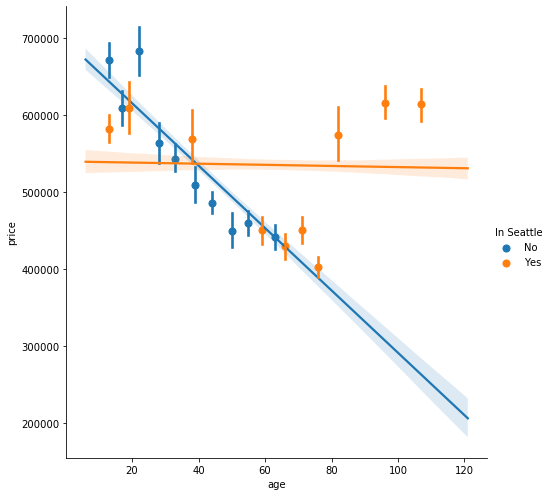

In [36]:
#plot a graph to see the correlation of price and age based on homes within Seattle vs not in Seattle
g=sns.lmplot(x="age", y="price", hue="in_seattle", data=df, scatter=True, x_bins=10, size=7)
new_title = 'In Seattle'
g._legend.set_title(new_title)
# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

➡️Curious trend where houses that are within seattle actually have a trend upwards in price for older homes

Train R2: 0.646
Test R2: 0.582
---
Train MAE: 143091.00
Test MAE: 139842.13
---
Train RMSE: 225866.58
Test RMSE: 220692.77


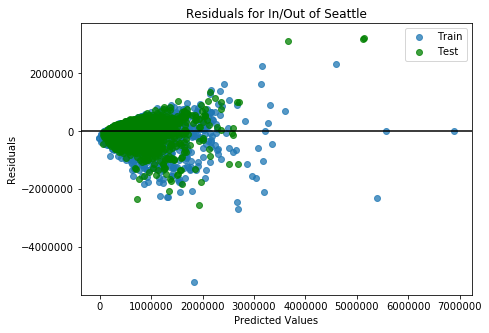

Model Name     R2        MAE       RMSE
5  In/Out of Seattle  0.582  139842.13  220692.77
4       Relative Age  0.568  143054.28  224208.53
3   OHE Categoricals  0.594  137320.29  217377.62
2     Log Continuous  0.583  147428.18  220297.41
1       Drop 33 Bdrm  0.609  143466.52  213338.85
0         Base Model  0.606  144470.47  226936.63

In [37]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'age'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade', 'in_seattle'] #define categorical variables
model, scaler, y_train_pred, y_test_pred, X_test, y_test, X, y = sjs.model_analysis('In/Out of Seattle', lr, df, continuous, categoricals, log=True, OHE=True, scale=True)

➡️Slight improvement in all 3 metrics

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
☒ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☒ Log continous variables  
☒ One Hot Encode categorical variables  
☒ Create an age columns based on year built or renovation year   
☒ Create a category of within Seattle vs. outside Seattle  
➡️ Set a price ceiling

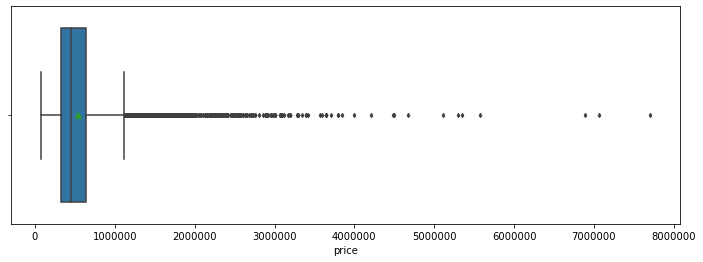

In [38]:
# check boxplot of target
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = df, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

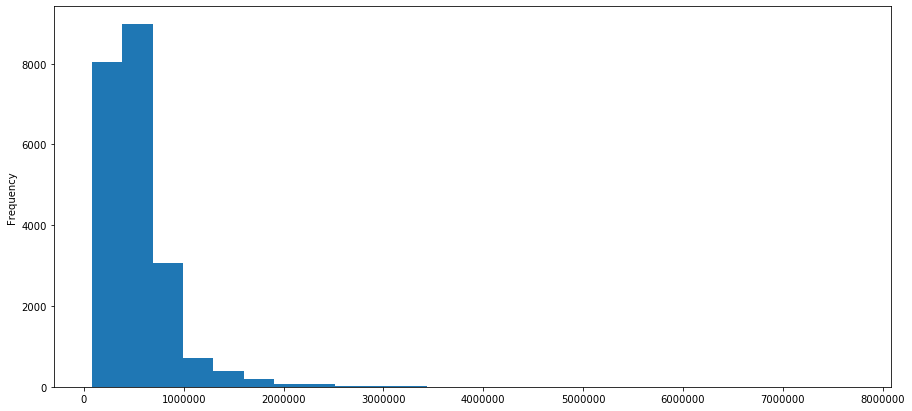

In [39]:
#check distribution
plt.figure(figsize=(15, 7))
df['price'].plot.hist(bins=25)

In [40]:
len(df[df['price']>1000000])/len(df) #approx 1 SD above mean

0.06751562861773559

Our price prediction tool will be limited for use of sub $1M price point - this seems reasonable as it is not something high end users will need and also our data is limited in that area to make accurate predictions, as we can see from risidual plot.

In [41]:
df1 = df[df['price']<1000000]
df1.sort_values(by = 'price').tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
8507   3425059141   5/28/2014  999000.0         7       4.00         3150   
18741   424069112   6/16/2014  999000.0         4       2.75         2800   
20849  8010100220  10/14/2014  999950.0         4       3.50         3310   
9733    686900030   3/23/2015  999950.0         3       2.25         3740   
21517   524059322   2/26/2015  999999.0         3       2.50         2100   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
8507      34830     1.0         0.0   0.0  ...            0.0      1957   
18741     19168     2.0         NaN   0.0  ...            0.0      1992   
20849      4684     2.0         NaN   0.0  ...         1020.0      2014   
9733      22464     2.0         0.0   0.0  ...         1410.0      1966   
21517      4097     2.0         0.0   0.0  ...            0.0      2008   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
8507         2005.0   98007  47.6029 -122.147           2390       12054   
18741           0.0   98075  47.5911 -122.037           2010       16020   
20849           0.0   98116  47.5790 -122.389           1850        4750   
9733            0.0   98004  47.6354 -122.196           2680       19564   
21517           0.0   98004  47.5983 -122.200           1780        4764   

        age  in_seattle  
8507   16.0           0  
18741  29.0           0  
20849   7.0           1  
9733   55.0           0  
21517  13.0           0  

[5 rows x 23 columns]

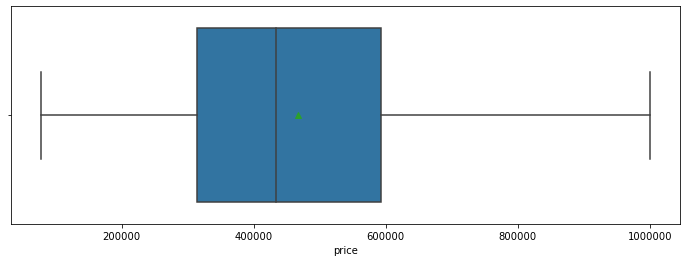

In [42]:
# check boxplot of sub-$1M target
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = df1, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

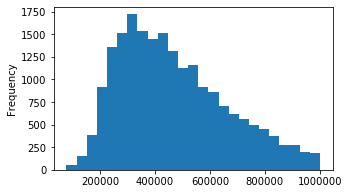

In [43]:
#check distribution of sub-$1M target
plt.figure(figsize=(5, 3))
df1['price'].plot.hist(bins=25)

Train R2: 0.529
Test R2: 0.536
---
Train MAE: 105613.33
Test MAE: 106097.54
---
Train RMSE: 133634.14
Test RMSE: 134302.07


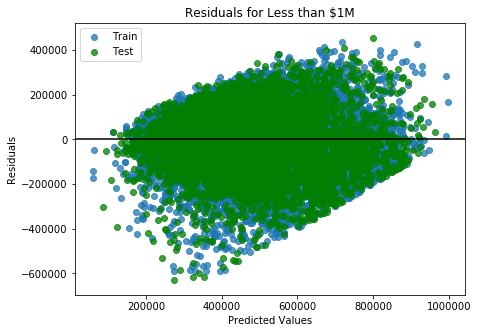

Model Name     R2        MAE       RMSE
6      Less than $1M  0.536  106097.54  134302.07
5  In/Out of Seattle  0.582  139842.13  220692.77
4       Relative Age  0.568  143054.28  224208.53
3   OHE Categoricals  0.594  137320.29  217377.62
2     Log Continuous  0.583  147428.18  220297.41
1       Drop 33 Bdrm  0.609  143466.52  213338.85
0         Base Model  0.606  144470.47  226936.63

In [44]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'age'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade', 'in_seattle'] #define categorical variables
model, scaler, y_train_pred, y_test_pred, X_test, y_test, X, y = sjs.model_analysis('Less than $1M', lr, df1, continuous, categoricals, log=True, OHE=True, scale=True)

➡️Significantly reduced MAE and RMSE but R2 also went down

---
## Evaluation

#### Plan Outline:
➡️ Train final model on entire dataset  
☐ Check for multicolinearity  
☐ Check QQ plot for normality  
☐ Evaluate and make recommendations  

Final R2: 0.532
Final MAE: 105659.45
Final RMSE: 133750.27


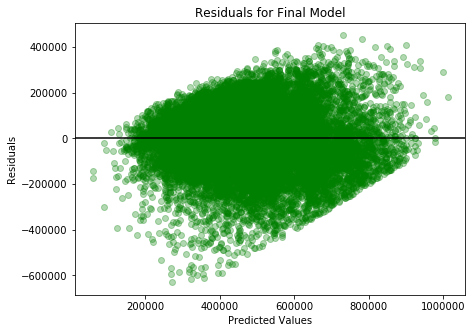

In [45]:
#Train our last fit scaler on entire data set
X_scaled = scaler.fit_transform(X)

#Fit our model on scaled data
model.fit(X_scaled, y)
    
#make predictions
y_pred = model.predict(X_scaled)
    
#calculate residuals
residuals = y_pred - y
    
#print final R2, MAE, RMSE
print(f"Final R2: {r2_score(y, y_pred):.3f}")
print(f"Final MAE: {mean_absolute_error(y, y_pred):.2f}")
print(f"Final RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")
                    
#risduals plot
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, color='g', alpha=.3)
plt.axhline(y=0, color='black')
plt.title('Residuals for Final Model')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()
    
#display feature weights using ELI5
display(eli5.show_weights(lr, feature_names=list(X.columns)))

In [46]:
#display Statsmodels summary for final model on entire scaled data set
sm_mod_scaled = sm.OLS(y, sm.add_constant(pd.DataFrame(X_scaled,
                                                       columns=X.columns,
                                                       index=X.index))).fit()
results_scaled = sm_mod_scaled.summary()
results_scaled

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     414.2
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:15:19   Log-Likelihood:            -2.6584e+05
No. Observations:               20105   AIC:                         5.318e+05
Df Residuals:                   20049   BIC:                         5.322e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.309e+05   1.53e+05     -0.855      0.392   -4.31e+05    1.69e+05
sqft_living_log    5.9e+05   1.44e+04     41.108      0.000    5.62e+05    6.18e+05
age_log          1.241e+05   6438.089     19.276      0.000    1.11e+05    1.37e+05
bedrooms_2      -2.049e+04   1.03e+04     -1.981      0.048   -4.08e+04    -213.431
bedrooms_3      -6.664e+04   1.04e+04     -6.395      0.000   -8.71e+04   -4.62e+04
bedrooms_4      -7.405e+04   1.07e+04     -6.912      0.000    -9.5e+04   -5.31e+04
bedrooms_5      -8.115e+04   1.14e+04     -7.122      0.000   -1.03e+05   -5.88e+04
bedrooms_6      -8.321e+04   1.44e+04     -5.796      0.000   -1.11e+05   -5.51e+04
bedrooms_7      -1.017e+05    2.8e+04     -3.640      0.000   -1.57e+05    -4.7e+04
bedrooms_8      -7.602e+04   4.65e+04     -1.635      0.102   -1.67e+05    1.51e+04
bedrooms_9       4.705e+04   7.87e+04      0.598      0.550   -1.07e+05    2.01e+05
bedrooms_10      8458.8462   9.55e+04      0.089      0.929   -1.79e+05    1.96e+05
bedrooms_11     -7.391e+04   1.35e+05     -0.549      0.583   -3.38e+05     1.9e+05
bathrooms_0.75   1.321e+05   6.91e+04      1.912      0.056   -3301.531    2.67e+05
bathrooms_1.0    1.015e+05   6.71e+04      1.513      0.130      -3e+04    2.33e+05
bathrooms_1.25   7.458e+04    8.4e+04      0.888      0.375   -9.01e+04    2.39e+05
bathrooms_1.5    8.922e+04   6.72e+04      1.328      0.184   -4.24e+04    2.21e+05
bathrooms_1.75   1.067e+05   6.71e+04      1.589      0.112   -2.49e+04    2.38e+05
bathrooms_2.0    1.057e+05   6.72e+04      1.574      0.115   -2.59e+04    2.37e+05
bathrooms_2.25   1.031e+05   6.72e+04      1.535      0.125   -2.86e+04    2.35e+05
bathrooms_2.5    9.757e+04   6.72e+04      1.453      0.146   -3.41e+04    2.29e+05
bathrooms_2.75   1.293e+05   6.73e+04      1.922      0.055   -2562.131    2.61e+05
bathrooms_3.0    1.169e+05   6.74e+04      1.735      0.083   -1.51e+04    2.49e+05
bathrooms_3.25   1.423e+05   6.75e+04      2.108      0.035    9976.149    2.75e+05
bathrooms_3.5    1.541e+05   6.75e+04      2.285      0.022    2.19e+04    2.86e+05
bathrooms_3.75    1.85e+05   6.91e+04      2.675      0.007    4.95e+04     3.2e+05
bathrooms_4.0    1.723e+05   6.94e+04      2.481      0.013    3.61e+04    3.08e+05
bathrooms_4.25   1.827e+05   7.28e+04      2.508      0.012    3.99e+04    3.25e+05
bathrooms_4.5    1.277e+05   7.03e+04      1.818      0.069   -9994.116    2.65e+05
bathrooms_4.75   2.138e+05   9.51e+04      2.247      0.025    2.73e+04       4e+05
bathrooms_5.0    7.376e+04   8.47e+04      0.871      0.384   -9.22e+04     2.4e+05
bathrooms_5.25   6.879e+04   1.17e+05      0.590      0.555    -1.6e+05    2.97e+05
bathrooms_5.5    1.444e+05   1.51e+05      0.958      0.338   -1.51e+05     4.4e+05
bathrooms_5.75   5943.9891   1.52e+05      0.039      0.969

In [47]:
#display Statsmodels summary for final model on entire unscaled data set
sm_mod_unscaled = sm.OLS(y, sm.add_constant(pd.DataFrame(X,
                                                         columns=X.columns,
                                                         index=X.index))).fit()
results_unscaled = sm_mod_unscaled.summary()
results_unscaled

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     414.2
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:15:19   Log-Likelihood:            -2.6584e+05
No. Observations:               20105   AIC:                         5.318e+05
Df Residuals:                   20049   BIC:                         5.322e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.365e+06   1.56e+05     -8.751      0.000   -1.67e+06   -1.06e+06
sqft_living_log  1.962e+05   4773.814     41.108      0.000    1.87e+05    2.06e+05
age_log          4.131e+04   2143.150     19.276      0.000    3.71e+04    4.55e+04
bedrooms_2      -2.049e+04   1.03e+04     -1.981      0.048   -4.08e+04    -213.431
bedrooms_3      -6.664e+04   1.04e+04     -6.395      0.000   -8.71e+04   -4.62e+04
bedrooms_4      -7.405e+04   1.07e+04     -6.912      0.000    -9.5e+04   -5.31e+04
bedrooms_5      -8.115e+04   1.14e+04     -7.122      0.000   -1.03e+05   -5.88e+04
bedrooms_6      -8.321e+04   1.44e+04     -5.796      0.000   -1.11e+05   -5.51e+04
bedrooms_7      -1.017e+05    2.8e+04     -3.640      0.000   -1.57e+05    -4.7e+04
bedrooms_8      -7.602e+04   4.65e+04     -1.635      0.102   -1.67e+05    1.51e+04
bedrooms_9       4.705e+04   7.87e+04      0.598      0.550   -1.07e+05    2.01e+05
bedrooms_10      8458.8462   9.55e+04      0.089      0.929   -1.79e+05    1.96e+05
bedrooms_11     -7.391e+04   1.35e+05     -0.549      0.583   -3.38e+05     1.9e+05
bathrooms_0.75   1.321e+05   6.91e+04      1.912      0.056   -3301.531    2.67e+05
bathrooms_1.0    1.015e+05   6.71e+04      1.513      0.130      -3e+04    2.33e+05
bathrooms_1.25   7.458e+04    8.4e+04      0.888      0.375   -9.01e+04    2.39e+05
bathrooms_1.5    8.922e+04   6.72e+04      1.328      0.184   -4.24e+04    2.21e+05
bathrooms_1.75   1.067e+05   6.71e+04      1.589      0.112   -2.49e+04    2.38e+05
bathrooms_2.0    1.057e+05   6.72e+04      1.574      0.115   -2.59e+04    2.37e+05
bathrooms_2.25   1.031e+05   6.72e+04      1.535      0.125   -2.86e+04    2.35e+05
bathrooms_2.5    9.757e+04   6.72e+04      1.453      0.146   -3.41e+04    2.29e+05
bathrooms_2.75   1.293e+05   6.73e+04      1.922      0.055   -2562.131    2.61e+05
bathrooms_3.0    1.169e+05   6.74e+04      1.735      0.083   -1.51e+04    2.49e+05
bathrooms_3.25   1.423e+05   6.75e+04      2.108      0.035    9976.149    2.75e+05
bathrooms_3.5    1.541e+05   6.75e+04      2.285      0.022    2.19e+04    2.86e+05
bathrooms_3.75    1.85e+05   6.91e+04      2.675      0.007    4.95e+04     3.2e+05
bathrooms_4.0    1.723e+05   6.94e+04      2.481      0.013    3.61e+04    3.08e+05
bathrooms_4.25   1.827e+05   7.28e+04      2.508      0.012    3.99e+04    3.25e+05
bathrooms_4.5    1.277e+05   7.03e+04      1.818      0.069   -9994.116    2.65e+05
bathrooms_4.75   2.138e+05   9.51e+04      2.247      0.025    2.73e+04       4e+05
bathrooms_5.0    7.376e+04   8.47e+04      0.871      0.384   -9.22e+04     2.4e+05
bathrooms_5.25   6.879e+04   1.17e+05      0.590      0.555    -1.6e+05    2.97e+05
bathrooms_5.5    1.444e+05   1.51e+05      0.958      0.338   -1.51e+05     4.4e+05
bathrooms_5.75   5943.9891   1.52e+05      0.039      0.969

In [48]:
#create dataframe to sort through significant p-values and corresponding coefficients sorted for scaled data
pvals_scaled = sm_mod_scaled.pvalues
coeff_scaled = sm_mod_scaled.params
OLS_results_scaled = pd.DataFrame({"coeff_scaled":coeff_scaled, "pvals_scaled":pvals_scaled})
OLS_results_scaled[OLS_results_scaled['pvals_scaled'] <=.05].sort_values(by=['coeff_scaled'], ascending = False)

coeff_scaled   pvals_scaled
sqft_living_log  589999.552727   0.000000e+00
grade_11         392526.898104   3.942621e-03
grade_10         338995.611951   1.234000e-02
bathrooms_4.75   213761.605162   2.467204e-02
bathrooms_3.75   184963.023835   7.468723e-03
bathrooms_4.25   182701.508397   1.214792e-02
bathrooms_4.0    172253.388720   1.312771e-02
bathrooms_3.5    154144.391648   2.233482e-02
bathrooms_3.25   142323.121554   3.505800e-02
age_log          124101.519686   4.709624e-82
condition_5       77406.900207   2.638132e-03
in_seattle_1      69722.600438  1.085404e-203
floors_2.5        49683.501655   1.991178e-04
floors_1.5        42627.736104   1.168402e-32
floors_3.0        40448.263763   2.398585e-09
floors_2.0        11515.105729   1.050450e-04
bedrooms_2       -20492.063514   4.763722e-02
bedrooms_3       -66642.803253   1.641235e-10
bedrooms_4       -74051.010843   4.918542e-12
bedrooms_5       -81150.054027   1.098208e-12
bedrooms_6       -83206.000621   6.889250e-09
bedrooms_7      -101748.402262   2.730900e-04

In [49]:
#create dataframe to sort through significant p-values and corresponding coefficients sorted for unscaled data
pvals_unscaled = sm_mod_unscaled.pvalues
coeff_unscaled = sm_mod_unscaled.params
OLS_results_unscaled = pd.DataFrame({"coeff_unscaled":coeff_unscaled, "pvals_unscaled":pvals_unscaled})
OLS_results_unscaled[OLS_results_unscaled['pvals_unscaled'] <=.05].sort_values(by=['pvals_unscaled'], ascending = True)

coeff_unscaled  pvals_unscaled
sqft_living_log    1.962423e+05    0.000000e+00
in_seattle_1       6.972260e+04   1.085404e-203
age_log            4.131166e+04    4.709624e-82
floors_1.5         4.262774e+04    1.168402e-32
const             -1.365391e+06    2.280478e-18
bedrooms_5        -8.115005e+04    1.098208e-12
bedrooms_4        -7.405101e+04    4.918542e-12
bedrooms_3        -6.664280e+04    1.641235e-10
floors_3.0         4.044826e+04    2.398585e-09
bedrooms_6        -8.320600e+04    6.889250e-09
floors_2.0         1.151511e+04    1.050450e-04
floors_2.5         4.968350e+04    1.991178e-04
bedrooms_7        -1.017484e+05    2.730900e-04
condition_5        7.740690e+04    2.638132e-03
grade_11           3.925269e+05    3.942621e-03
bathrooms_3.75     1.849630e+05    7.468723e-03
bathrooms_4.25     1.827015e+05    1.214792e-02
grade_10           3.389956e+05    1.234000e-02
bathrooms_4.0      1.722534e+05    1.312771e-02
bathrooms_3.5      1.541444e+05    2.233482e-02
bathrooms_4.75     2.137616e+05    2.467204e-02
bathrooms_3.25     1.423231e+05    3.505800e-02
bedrooms_2        -2.049206e+04    4.763722e-02

#### Plan Outline:
☒ Train final model on entire dataset  
➡️ Check for multicolinearity  
☐ Check QQ plot for normality  
☐ Evaluate and make recommendations  

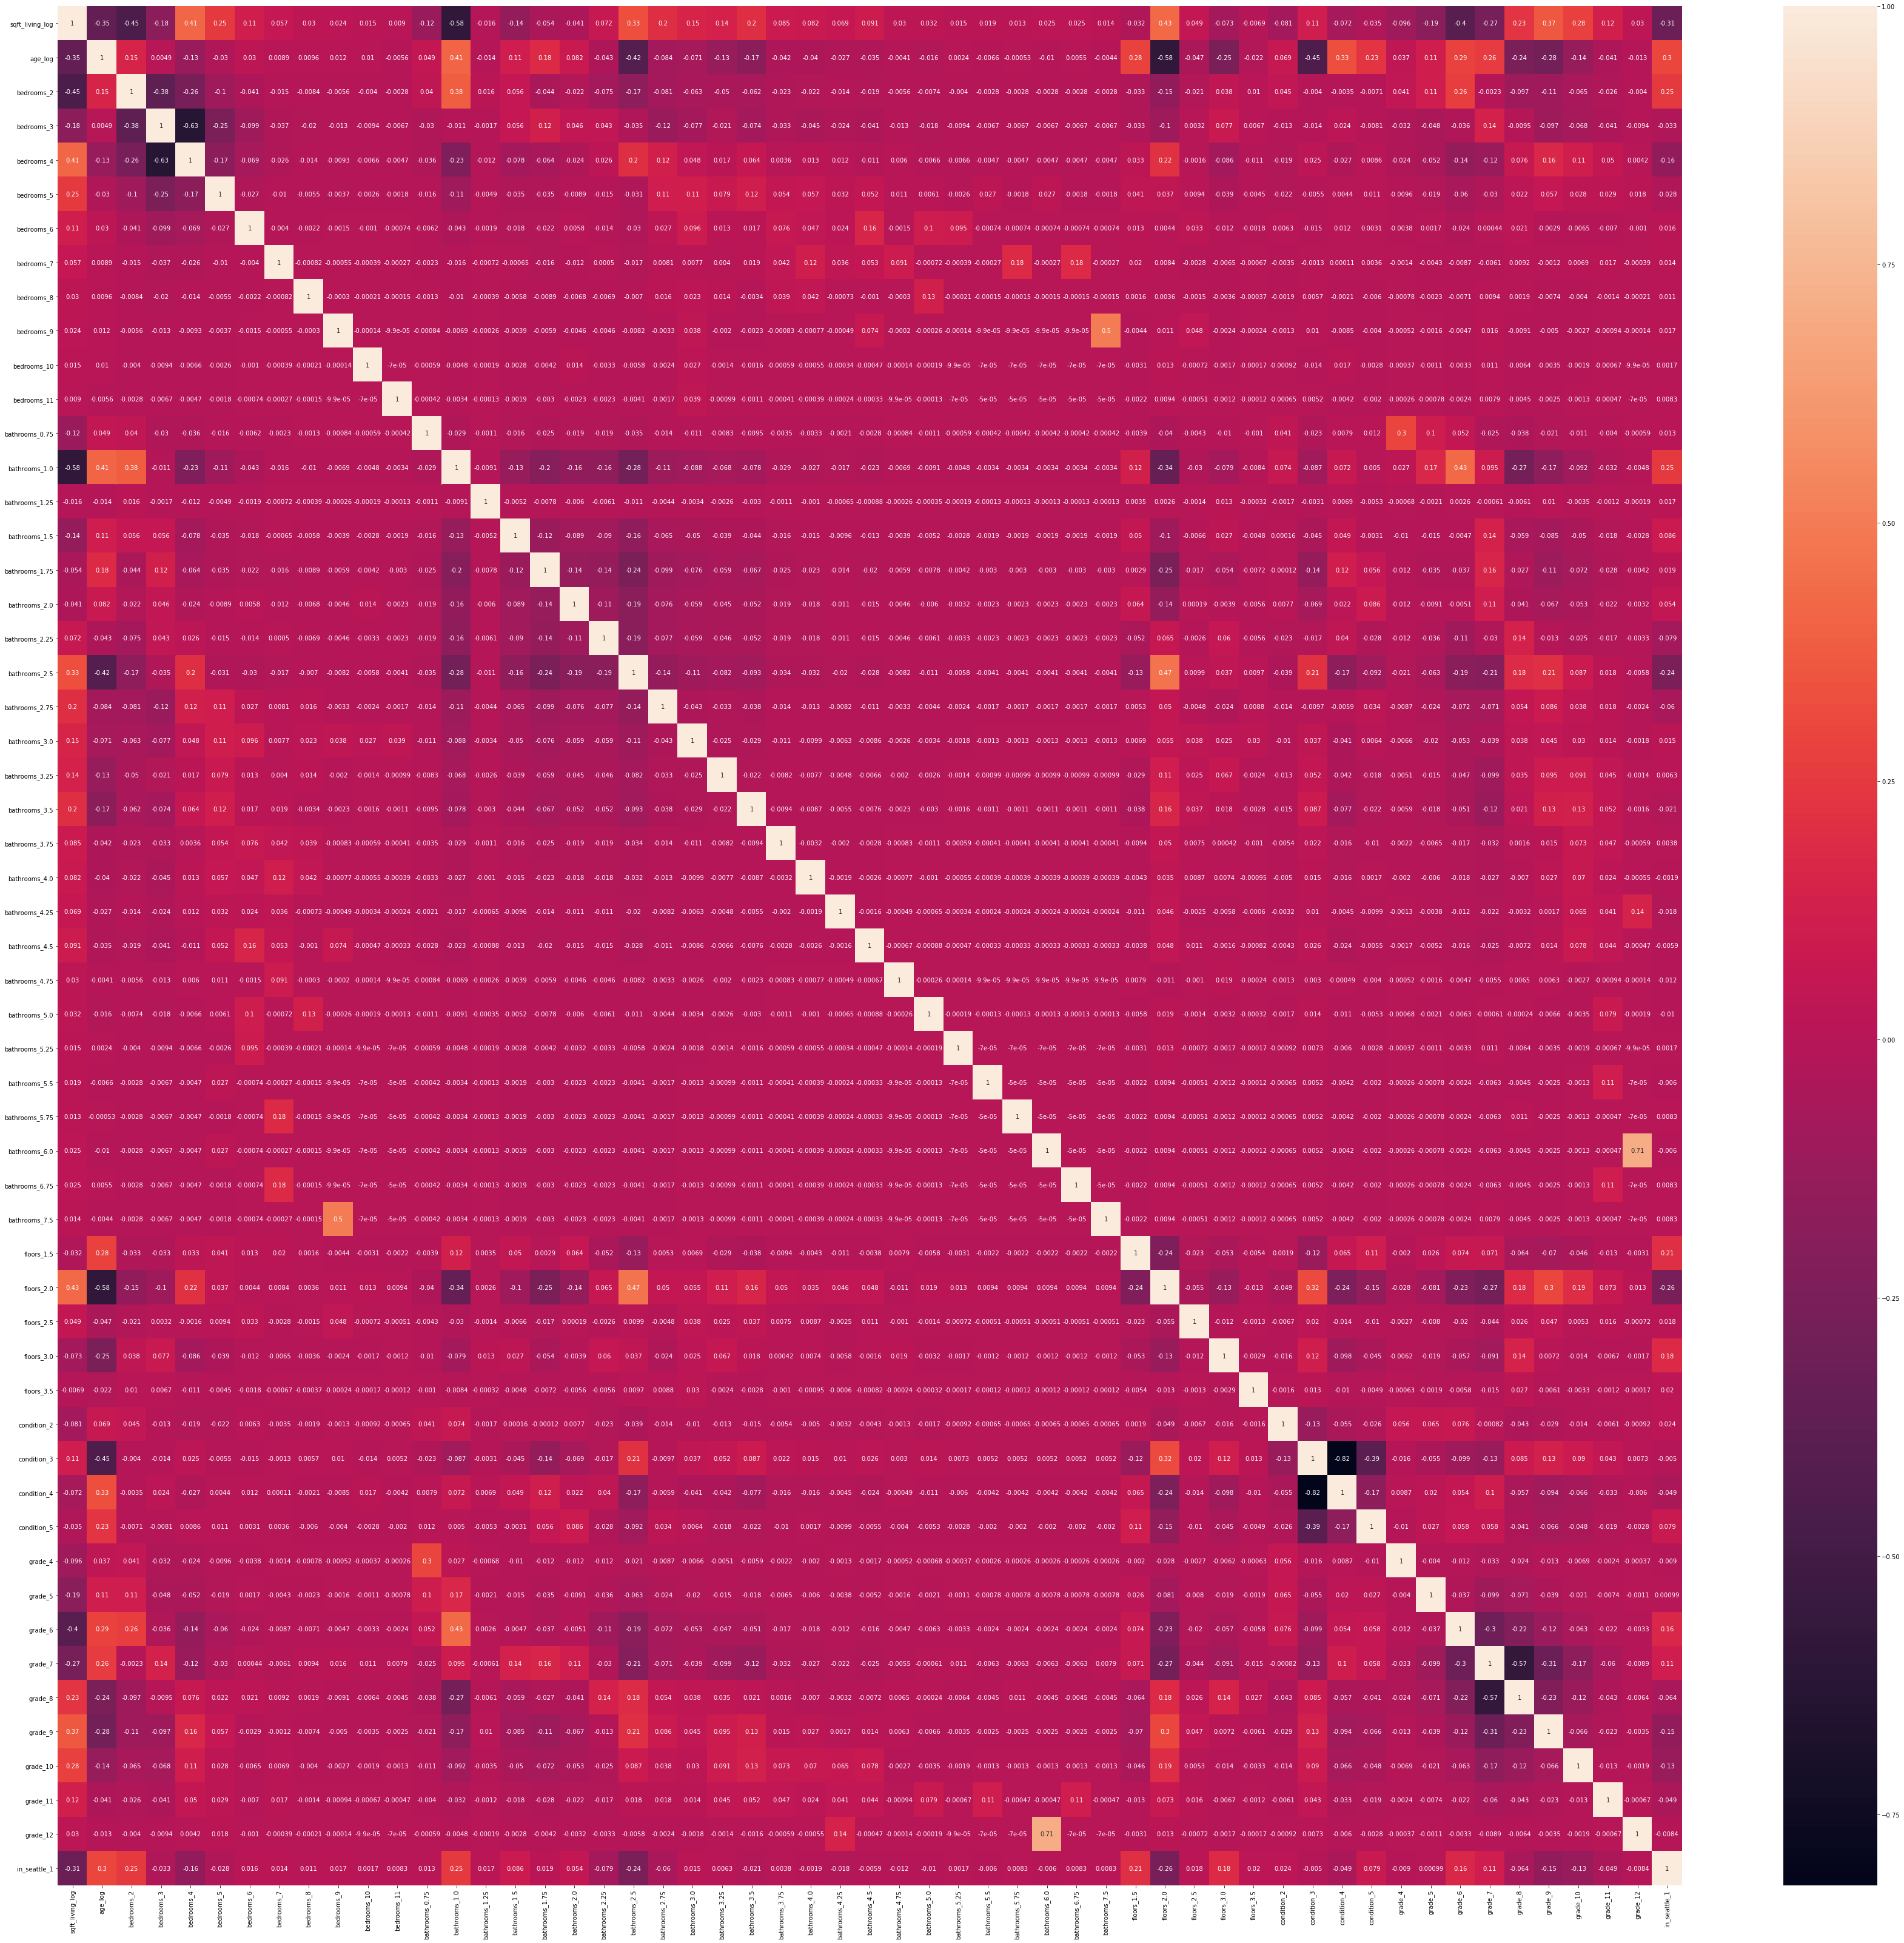

In [50]:
# visualize any multicolinearity
fig, ax = plt.subplots(figsize=(60,57))
ax = sns.heatmap(X.corr(), annot=True)
ax.set_ylim(55,0)
plt.show()

In [51]:
# find pairs that are have value above .75
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

mc=X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
mc['pairs'] = list(zip(mc.level_0, mc.level_1))

# set index to pairs
mc.set_index(['pairs'], inplace = True)

#d rop level columns
mc.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
mc.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
mc.drop_duplicates(inplace=True)

In [52]:
mc[(mc.cc>.75) & (mc.cc <1)]

cc
pairs                               
(condition_3, condition_4)  0.818575

➡️ The condition columns 3 and 4 are highly correlated. Conditions (as well as bathrooms for that matter) could be binned for future work

#### Plan Outline:
☒ Train final model on entire dataset  
☒ Check for multicolinearity  
➡️ Check QQ plot for normality  
☐ Evaluate and make recommendations  

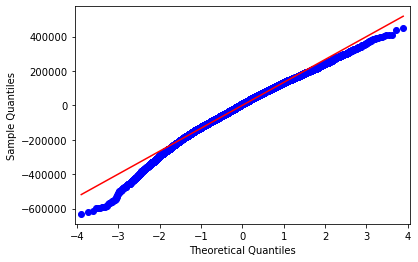

In [53]:
fig = sm.qqplot(residuals, line = 'r')

➡️ The residuals visually meet the normality requirement

#### Plan Outline:
☒ Train final model on entire dataset  
☒ Check large residuals for any patterns  
☒ Check for multicolinearity  
☒ Check QQ plot for normality  
➡️ Evaluate and make recommendations  

I created 6 models beyond our base model and found that there were varying R2 values ranging from .532 to .609. I found that the last model minimized the MAE and RMSE to the smallest amount. The last model was slightly underfit based on the train vs test. This model was then run on the entire data set and returned a R2 of 0.532. This means that our final model can explain 53.2% of variance in prices. Based on the train-test split, this model is generalizable and can be used for data not yet seen.  

---

## Recommendations

In it's current form, this model is a better predictor of price than the simple mean price of \\$540,296.60 or even median of \\$450,000. I believe with further modeling, it can be very useful as a tool for buyer's real estate agents making offer price recommendations for time home-buyers. They can even make recommendations to first-time home buyers to reduce their price cost. For example, our model shows that square footage, whether or not the house is in Seattle as well as age greatly affect price. So to reduce cost, first-time home buyers can opt for smaller, slightly older homes outside of Seattle.

---

## Future Work

I believe that having an offer price that is data-driven is a very strong tool for a Buyer's Real Estate Agent and so we would recommend this Real Estate Agency continue to support the development of this tool. This could empower the already intuitive decision making that experienced Real Estate Agents engage in. The following are some potential areas of future work:

1) Creating separate prediction tools for different types of buyers - such as those looking to flip houses, first-time home buyers and luxury home buyers    
2) Experiment with inclusion of all available parameters.  
3) Build a graphical user interface where all available information can be input for easy use of prediction tool

---
## Edited Visualizations for Non-Technical Presentation

<Figure size 720x504 with 0 Axes>

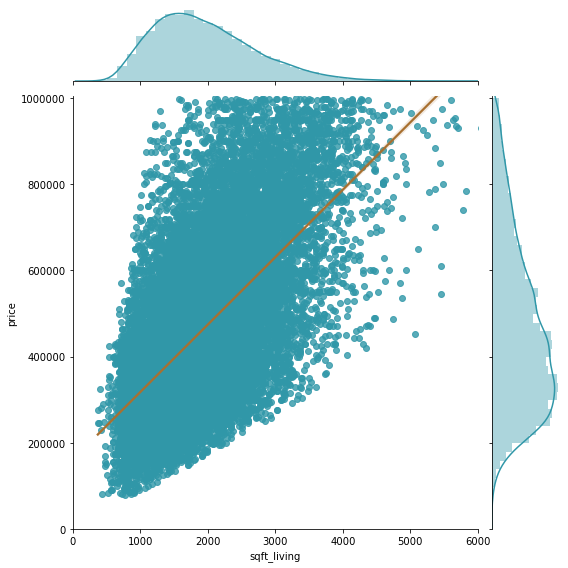

In [54]:
plt.figure(figsize=(10,7))
sns.jointplot(data=df1, x='sqft_living', y='price', kind='reg', height=8, ratio=5, xlim=(0, 6000), ylim=(0, 1005000), color="#3097a8", joint_kws={'line_kws':{'color':'#a87030'}})
#plt.savefig('images/cont_variable_sqft_vs_price.png')

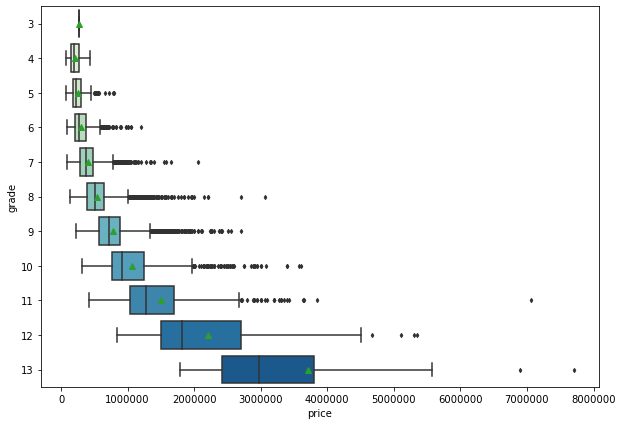

In [55]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(y = 'grade', x = 'price', data = df, width = 0.8, orient = 'h', showmeans = True, fliersize = 3, palette='GnBu')
#plt.savefig('images/cat_variable_grade_vs_price.png')
plt.show()

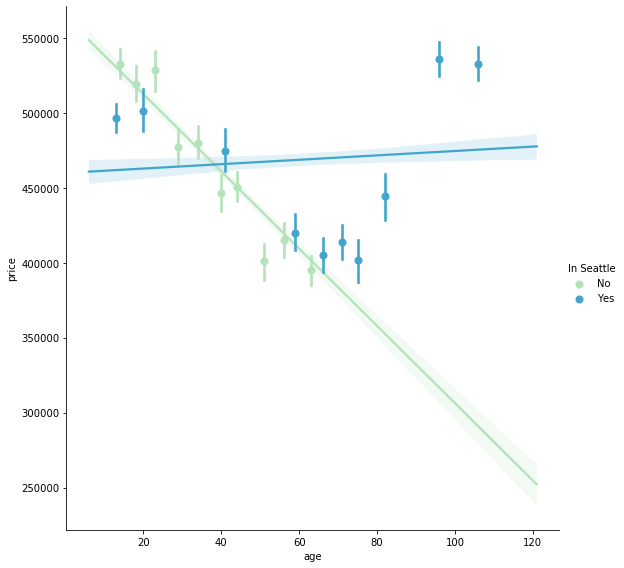

In [56]:
g=sns.lmplot(x="age", y="price", hue="in_seattle", data=df1, scatter=True, x_bins=10, size=8, palette='GnBu')
new_title = 'In Seattle'
g._legend.set_title(new_title)
# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
#plt.savefig('images/age_vs_price_in_or_out_seattle.png')
plt.show()